In [47]:
#Exploratory data analysis and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#plots will appear inside the notebook
%matplotlib inline

In [51]:
#models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [53]:
#model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [55]:
#Load Data
df=pd.read_csv("./dataset/heart_disease.csv",index_col=0)
df.shape

(303, 14)

In [57]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no


In [59]:
#Data Exploration
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [61]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no
302,57,female,1,130.0,236.0,0,0,174.0,0,0.0,1,1,2,no


In [63]:
#count of each class in target variable
df["target"].value_counts()

target
yes    165
no     138
Name: count, dtype: int64

<Axes: xlabel='target'>

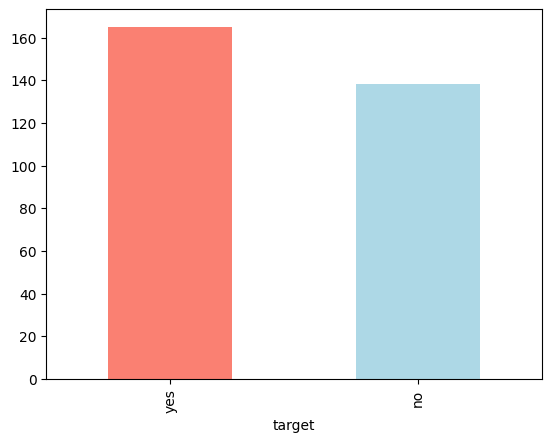

In [65]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   298 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 35.5+ KB


In [69]:
#find missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [71]:
#fill missing values
df['trestbps']=df['trestbps'].fillna(df['trestbps'].mean())

In [79]:
df['chol']=df['chol'].fillna(df['chol'].mean())

In [81]:
df['thalach']=df['thalach'].fillna(df['thalach'].mean())

In [83]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.511894,51.822273,0.356198,0.525860,22.376122,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [89]:
#frequency count according to sex
df['sex'].value_counts()

sex
male      207
female     96
Name: count, dtype: int64

In [91]:
#compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,female,male
target,,
no,24,114
yes,72,93
